In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [200]:
df = pd.read_csv("Telecom_customer churn_Final.csv")

In [201]:
churn_df = df.iloc[:,70:101]

In [202]:
churn_df.isnull().sum()

prizm_social_one     7388
area                   40
dualband                1
refurb_new              1
hnd_price             847
phones                  1
models                  1
hnd_webcap          10189
truck                1732
rv                   1732
ownrent             33706
lor                 30190
dwlltype            31909
marital              1732
adults              23019
infobase            22079
income              25436
numbcars            49366
HHstatin            37923
dwllsize            38308
forgntvl             1732
ethnic               1732
kid0_2               1732
kid3_5               1732
kid6_10              1732
kid11_15             1732
kid16_17             1732
creditcd             1732
eqpdays                 1
Customer_ID             0
dtype: int64

## I DONT THNIK CUSTOMER ID TO BE IMPUTED ANYHOW WE WILL REMOVE IT
## SO I DIDNT IMPUTED

In [203]:
churn_df.columns


Index(['prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price',
       'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor',
       'dwlltype', 'marital', 'adults', 'infobase', 'income', 'numbcars',
       'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5',
       'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays',
       'Customer_ID'],
      dtype='object')

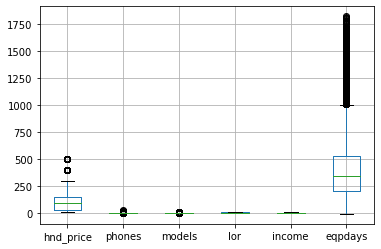

In [204]:
churn_df[['hnd_price','phones','models','lor','income','eqpdays']].boxplot()

In [205]:
# Continous missing value for non outlier columns with mean

NanVal_noOutliers = churn_df[['lor','income']]

for col in NanVal_noOutliers:
    NanVal_noOutliers[col].fillna(np.mean(NanVal_noOutliers[col]),inplace=True)
   

In [206]:
# Continous missing value for having outlier columns with median


NanVal_outliers = churn_df[['hnd_price','phones','models','eqpdays']]

for col in NanVal_outliers:
            NanVal_outliers[col].fillna(NanVal_outliers[col].median(), inplace=True)



In [207]:
print(NanVal_noOutliers.isnull().sum())
print(NanVal_outliers.isnull().sum())

lor       0
income    0
dtype: int64
hnd_price    0
phones       0
models       0
eqpdays      0
dtype: int64


In [208]:
# Categorical missing values 

categorical_NanVal = churn_df[['prizm_social_one','area','refurb_new','dualband','hnd_webcap','ownrent','dwlltype','marital','infobase','HHstatin','dwllsize','ethnic','kid0_2','kid3_5','kid6_10','kid11_15','kid16_17','creditcd']]

for col in categorical_NanVal:
        categorical_NanVal[col].fillna(categorical_NanVal[col].mode()[0], inplace=True)
        



In [209]:
categorical_NanVal.isnull().sum()

prizm_social_one    0
area                0
refurb_new          0
dualband            0
hnd_webcap          0
ownrent             0
dwlltype            0
marital             0
infobase            0
HHstatin            0
dwllsize            0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
dtype: int64

In [210]:
# Number categorical Values

No_categorical_NanVal = churn_df[['truck','rv','adults','numbcars','forgntvl']]

for col in No_categorical_NanVal:
      No_categorical_NanVal[col].fillna(No_categorical_NanVal[col].mode()[0], inplace=True)

      


In [211]:
No_categorical_NanVal.isnull().sum()

truck       0
rv          0
adults      0
numbcars    0
forgntvl    0
dtype: int64

In [212]:
churn_df = pd.concat([NanVal_noOutliers, NanVal_outliers,categorical_NanVal,No_categorical_NanVal], axis=1)

In [213]:
churn_df.shape

(100000, 29)

In [214]:
churn_df.isnull().sum()

lor                 0
income              0
hnd_price           0
phones              0
models              0
eqpdays             0
prizm_social_one    0
area                0
refurb_new          0
dualband            0
hnd_webcap          0
ownrent             0
dwlltype            0
marital             0
infobase            0
HHstatin            0
dwllsize            0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
truck               0
rv                  0
adults              0
numbcars            0
forgntvl            0
dtype: int64

In [215]:
churn_df.columns

Index(['lor', 'income', 'hnd_price', 'phones', 'models', 'eqpdays',
       'prizm_social_one', 'area', 'refurb_new', 'dualband', 'hnd_webcap',
       'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize',
       'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17',
       'creditcd', 'truck', 'rv', 'adults', 'numbcars', 'forgntvl'],
      dtype='object')